In [7]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from src.events.extract_events import process_signal
sns.set(rc={'figure.figsize':(10,5)})

In [8]:
raw_path = "data/medal-1-2017-01-16T09-04-39.578406T+0100-0010364.hdf5"
raw = h5py.File(raw_path, 'r')
raw_current = raw['current4']
idx = 5571000

current, _ = process_signal(raw, 4)

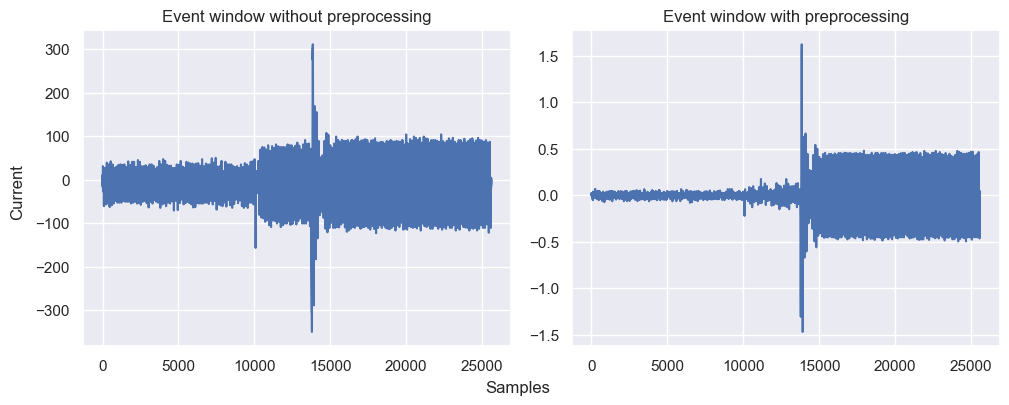

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(raw_current[idx:idx+25600])
axes[1].plot(current[idx:idx+25600])

fig.text(0.5, 0.01, 'Samples', ha='center', va='center')
fig.text(0.0, 0.5, 'Current', ha='center', va='center', rotation='vertical')

axes[0].set_title('Event window without preprocessing')
axes[1].set_title('Event window with preprocessing')

plt.tight_layout()
plt.savefig('figures/preprocessing.svg', dpi=300, bbox_extra_artists=(fig,), bbox_inches='tight')
plt.show()

In [10]:
raw_path = "data/medal-1-2017-03-01T13-20-42.962884T+0100-0014605.hdf5"
raw = h5py.File(raw_path, 'r')
raw_current = raw['current3']


current, voltage = process_signal(raw, 3)

current = current.reshape(45000, 128)
voltage = voltage.reshape(45000, 128)
active = np.sum(current * voltage / 128, axis=1)

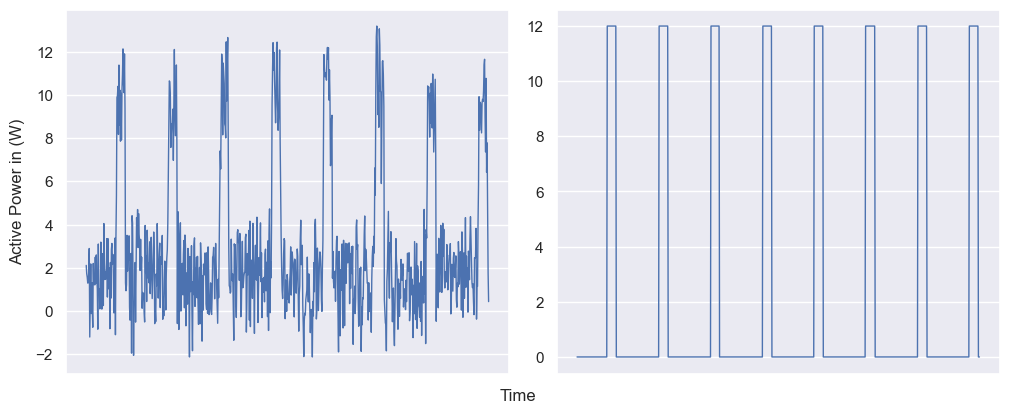

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(active[5000:5800], linewidth=1)
axes[0].set_xticks([])
tmp = active[:]
tmp[active > 5.3] = 12
tmp[active <= 5.3] = 0
axes[1].plot(tmp[5000:5800], linewidth=1)
axes[1].set_xticks([])

fig.text(0.5, -0.01, 'Time', ha='center', va='center')
fig.text(0.0, 0.5, 'Active Power in (W)', ha='center', va='center', rotation='vertical')

#plt.suptitle('Battery charger power consumption over time')

plt.tight_layout()
plt.savefig('figures/battery_charger.svg', dpi=300, bbox_extra_artists=(fig,), bbox_inches='tight')
plt.show()

